In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pandas as pd
import seaborn as sns
import itertools
import warnings
from time import time
from scipy import stats

warnings.filterwarnings('ignore')

In [6]:
results_pp11 = np.load('data/results_pp11.npy', allow_pickle=True)
results_pp11_df = pd.DataFrame.from_records(results_pp11).set_index('cutoff')

results_pp11_df['E_avg'] = results_pp11_df[['Ex', 'Ed', 'Ed2']].mean(axis=1)

In [7]:
pp11_df_regimes = pd.DataFrame({'E': [0.732, 0.876, 0.993, 0.867, 0.83], 
                                'Regime': ['Static', 'Dynamic', 'Dynamic+', 'Average', 'MD']})

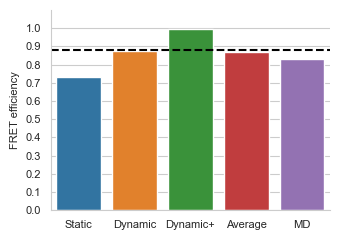

In [10]:
sns.set_style('whitegrid')

g = sns.catplot(data=pp11_df_regimes,
                x='Regime', y='E', hue='Regime',
                kind="bar", legend=False)

plt.axhline(0.88, color='k', linestyle = '--')

g.fig.set_size_inches(3.5, 2.5)

ax = g.axes

ax[0, 0].set_ylim(0, 1.1)
ax[0, 0].set_yticks(np.arange(0,1.1, 0.1))
        
for label in (ax[0, 0].get_xticklabels() + ax[0, 0].get_yticklabels()):
    label.set_fontsize(8)

ax[0, 0].set_xlabel('', fontsize=10)
ax[0, 0].set_ylabel('FRET efficiency', fontsize=8)

plt.tight_layout()

plt.show()

g.savefig('figs/Fig3.pdf')